#Task 1

In [ ]:
pip install google-play-scraper

In [ ]:
from google_play_scraper import app ,Sort, reviews_all

import pandas as pd

import numpy as np
from google.colab import files
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

In [4]:
our_app_reviews = reviews_all('net.vonforst.evmap', sleep_milliseconds=0)
comp_1_reviews = reviews_all('com.xatori.Plugshare', sleep_milliseconds=0)
comp_2_reviews = reviews_all('com.coulombtech', sleep_milliseconds=0)
sim_1_reviews = reviews_all('com.ea.evowner', sleep_milliseconds=0)
sim_2_reviews = reviews_all('com.addenergie.circuitelectrique', sleep_milliseconds=0)

In [5]:
our_app_reviews = pd.json_normalize(our_app_reviews)
comp_1_reviews = pd.json_normalize(comp_1_reviews)
comp_2_reviews = pd.json_normalize(comp_2_reviews)
sim_1_reviews = pd.json_normalize(sim_1_reviews)
sim_2_reviews = pd.json_normalize(sim_2_reviews)

In [6]:
our_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12 non-null     object        
 1   userName              12 non-null     object        
 2   userImage             12 non-null     object        
 3   content               12 non-null     object        
 4   score                 12 non-null     int64         
 5   thumbsUpCount         12 non-null     int64         
 6   reviewCreatedVersion  11 non-null     object        
 7   at                    12 non-null     datetime64[ns]
 8   replyContent          4 non-null      object        
 9   repliedAt             4 non-null      datetime64[ns]
 10  appVersion            11 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.2+ KB


In [7]:
columns_to_drop = ['reviewId', 'userImage', 'thumbsUpCount','reviewCreatedVersion', 'at' ,'replyContent', 'repliedAt', 'appVersion']
our_app_reviews = our_app_reviews.drop(columns=columns_to_drop)
our_app_reviews.rename(columns={'userName': 'Reviewer name', 'content': 'Review', 'score': 'Rating'}, inplace=True)
our_app_reviews.insert(0, "Package Name", "net.vonforst.evmap", True)
our_app_reviews.to_csv('net.vonforst.evmap.csv', index=False)
files.download('net.vonforst.evmap.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
comp_1_reviews = comp_1_reviews.drop(columns=columns_to_drop)
comp_1_reviews.rename(columns={'userName': 'Reviewer name', 'content': 'Review', 'score': 'Rating'}, inplace=True)
comp_1_reviews.insert(0, "Package Name", "com.xatori.Plugshare", True)
comp_1_reviews.to_csv('com.xatori.Plugshare.csv', index=False)
files.download('com.xatori.Plugshare.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
comp_2_reviews = comp_2_reviews.drop(columns=columns_to_drop)
comp_2_reviews.rename(columns={'userName': 'Reviewer name', 'content': 'Review', 'score': 'Rating'}, inplace=True)
comp_2_reviews.insert(0, "Package Name", "com.coulombtech", True)
comp_2_reviews.to_csv('com.coulombtech.csv', index=False)
files.download('com.coulombtech.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
sim_1_reviews = sim_1_reviews.drop(columns=columns_to_drop)
sim_1_reviews.rename(columns={'userName': 'Reviewer name', 'content': 'Review', 'score': 'Rating'}, inplace=True)
sim_1_reviews.insert(0, "Package Name", "com.ea.evowner", True)
sim_1_reviews.to_csv('com.ea.evowner.csv', index=False)
files.download('com.ea.evowner.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
sim_2_reviews = sim_2_reviews.drop(columns=columns_to_drop)
sim_2_reviews.rename(columns={'userName': 'Reviewer name', 'content': 'Review', 'score': 'Rating'}, inplace=True)
sim_2_reviews.insert(0, "Package Name", "com.addenergie.circuitelectrique", True)
sim_2_reviews.to_csv('com.addenergie.circuitelectrique.csv', index=False)
files.download('com.addenergie.circuitelectrique.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Task 2

In [ ]:
pip install num2words

In [12]:
combined_reviews_original = pd.concat([our_app_reviews, comp_1_reviews, comp_2_reviews, sim_1_reviews,sim_2_reviews], axis=0, ignore_index=True)
combined_reviews =  pd.concat([our_app_reviews, comp_1_reviews, comp_2_reviews, sim_1_reviews,sim_2_reviews], axis=0, ignore_index=True)

In [13]:
#lower case
combined_reviews['Review'] = combined_reviews['Review'].str.lower()

In [14]:
#remove white spaces
combined_reviews['Review'] = combined_reviews['Review'].str.strip()

In [21]:
# converting numbers into words
from num2words import num2words
import string
def convert_number(text):
    words = []
    for word in str(text).split():
        try:
            # Try to convert the word to a number
            number = int(word)
            # Convert the number to words and append to the list
            words.append(num2words(number))
        except ValueError:
            # If the word is not a number, keep it unchanged
            words.append(word)
    # Join the words to form the transformed text
    return ' '.join(words)

combined_reviews['Review'] = combined_reviews['Review'].apply(lambda text: convert_number(text))

In [22]:
#remove punctuation

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

combined_reviews['Review'] = combined_reviews["Review"].apply(lambda text: remove_punctuation(text))

In [23]:
#removing stop words
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

combined_reviews['Review'] = combined_reviews['Review'].apply(lambda text: remove_stopwords(text))

In [24]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

combined_reviews['Review'] = combined_reviews["Review"].apply(lambda text: remove_emoji(text))

In [25]:
# lemmitization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

combined_reviews['Review'] = combined_reviews['Review'].apply(lambda text: lemmatize_words(text))

In [32]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df = combined_reviews[['Review']].sample(n=15)
df.head(15)

,Review
8378,gr8 app mostly accurate helpful
2589,superb app ev owner well done guy
10178,crap app
11248,cant log app invalid username username password work website
3348,miss charger
9545,love keep simple stats compare usage cost energy etc even multiple plugin vehicle chargepoint flo joining ive switched using app useful flos app youve got home charger chargepoint app really shine
4913,good 58kw app work perfectly
10526,love 100kwhr even could 140
10291,one best bmw commercial highly enjoyable clean traveling experience provider great able get charge almost anywhere thanks itd cool set one day appreciate broading horizon gas involved
10699,app mood swing doesnt connect charging station every time electrify america issue charging station app make hate ev regret


#Task 3

part 1

In [33]:
 from textblob import TextBlob

 def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # You can also use .subjectivity for subjectivity

# Apply the function to the 'text' column and create a new 'Polarity' column
combined_reviews['Polarity_1'] = combined_reviews['Review'].apply(analyze_sentiment)

part 2

In [34]:
df = combined_reviews[['Package Name', 'Review', 'Polarity_1']].sample(n=250)
df.head(250)

,Package Name,Review,Polarity_1
6016,com.coulombtech,app say cannot connect yet charging car constantly close app reopen register charging app,0.000000
7881,com.coulombtech,good doesnt tell issue pop,0.700000
1684,com.xatori.Plugshare,pretty complete inventory hopefully obsolete soon charger become ubiquitous,0.175000
2729,com.xatori.Plugshare,fine could better would liked see better trip planning feature,0.504167
708,com.xatori.Plugshare,wonderful dealership let fast charge vehicle,0.600000
3854,com.xatori.Plugshare,best app finding charge station,1.000000
9448,com.coulombtech,work well easy use,0.433333
9990,com.coulombtech,back button hit leave station location exit app frustrating,-0.200000
1135,com.xatori.Plugshare,doesnt show fast charger,0.200000
9425,com.coulombtech,easy use unobtrusive great way get feedback various location,0.411111


part 3

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

combined_reviews['Polarity_2'] = combined_reviews['Review'].apply(analyze_sentiment_vader)

part 4

In [36]:
df = combined_reviews[['Package Name', 'Review', 'Polarity_2']].sample(n=250)
df.head(250)

,Package Name,Review,Polarity_2
2427,com.xatori.Plugshare,simple handy app,0.0000
10904,com.ea.evowner,147kw,0.0000
10429,com.ea.evowner,looking forward troutdale location getting running closest,0.0000
3094,com.xatori.Plugshare,work well extensive nice route planing feature,0.5994
10795,com.ea.evowner,app buggy dont understand every charger two cable one used time never able start session app,0.0000
9376,com.coulombtech,helpful,0.4215
4515,com.coulombtech,great,0.6249
8626,com.coulombtech,job,0.0000
4080,com.coulombtech,doesnt work,0.0000
6101,com.coulombtech,charge slow expensive useless,-0.4215


part 5:

In [37]:
def categorize_number(x):
    if x < -0.05:
        return 'negative'
    elif x > 0.05:
        return 'positive'
    else:
        return 'neutral'

combined_reviews['Sentiment_1'] = combined_reviews['Polarity_1'].apply(categorize_number)
combined_reviews['Sentiment_2'] = combined_reviews['Polarity_2'].apply(categorize_number)

print(combined_reviews['Sentiment_1'].value_counts())
print(combined_reviews['Sentiment_2'].value_counts())

positive    7407
neutral     2890
negative    1179
Name: Sentiment_1, dtype: int64
positive    7631
neutral     2249
negative    1596
Name: Sentiment_2, dtype: int64


In [38]:
diff = 0.0
no_of_same_vals = 0

for index,row in combined_reviews.iterrows():
    diff = diff + abs(float(row['Polarity_1']) - float(row['Polarity_2']))
    if(row['Sentiment_1'] == row['Sentiment_2']):
      no_of_same_vals += 1

numofrows = combined_reviews.shape[0]

avgdiff = diff / numofrows
sameSentiment = (no_of_same_vals * 100)/ numofrows

print(f"Average diff: {avgdiff}")
print(f"Same Sentiment: {sameSentiment}")

Average diff: 0.25806020237679855
Same Sentiment: 76.86476124085047


In [39]:
count = 0
for index,row in combined_reviews.iterrows():
  if(row['Sentiment_1'] == 'positive' and row['Sentiment_2'] == 'positive' and row['Rating'] >= 3):
    count += 1

print(f"Positive Reviews and high rating percent: {count*100/7500}")

Positive Reviews and high rating percent: 81.85333333333334


#Discussion for part 5
Vader and Textblob have a similar purpose that is both provide a compound polarity score which helps the user deduce if a piece of text has an overall sentiment of positive, negative, or neutral. For both Textblob and Vader, I categorized the polarity scores generated by them by using typical
threshold values used in NLP. A score of greater than or equal to 0.05 means positive, a score between -0.05 and 0.05 means neutral, and any score equal to or less than -0.05 means negative. To determine how the sentiments retrieved by Textblob and Vader compare with each other I did some numerical analysis.
The avg difference between the polarity scores by the both is 0.258 which is not quite significant as it would not cause alot of review's sentiment to be catogerized differently using our criteria other than the border cases.
We also check this by looking at how many review sentiments they agree on. As we can see they agree on almost 77% of the reviews. That can be interpreted as that for 77% of the reviews they agree on what that reviews sentiment is.

To look at the coorelation between polarity score and rating given by user with the review we can see that almost 80% of the reviews catogerized as positive by both vader and textblob have a rating of 3 or more. Moreover comparing the rating of the app with overall sentiment scores we can see that almost 10,000 of the total 11,400 reviews are either postive or neutral. and the avg of the all the 5 apps being studied is 4.34 which shows that users are mostly happy with the apps and that is being correctly reflected in their sentiments in the reviews.

#Task 4

In [40]:
# importing the data file
url = "https://raw.githubusercontent.com/khan-hashim/Intro-To-Artificial-Intelligence/main/reviews_classified_lemmatized.csv"

data = pd.read_csv(url)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App package      590 non-null    object 
 1   Language         590 non-null    object 
 2   Rating           590 non-null    int64  
 3   Date             590 non-null    object 
 4   User             590 non-null    object 
 5   Review title     418 non-null    object 
 6   Review text      590 non-null    object 
 7   Review category  590 non-null    object 
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      4 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 50.8+ KB


In [42]:
# removing unnesscary  columns and renaming columns to make them same as app's data
columns_to_drop_2 = ['App package', 'Language', 'Date', 'User', 'Review title', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']
data = data.drop(columns=columns_to_drop_2)
data.rename(columns={'Review text': 'Review'}, inplace=True)

# preprocessing review test column for getting reviews polarity
data["Review"] = data["Review"].str.lower()
data["Review"] = data["Review"].str.strip()
data['Review'] = data['Review'].apply(lambda text: convert_number(text))
data['Review'] = data["Review"].apply(lambda text: remove_punctuation(text))
data['Review'] = data["Review"].apply(lambda text: remove_emoji(text))
data['Review'] = data['Review'].apply(lambda text: remove_stopwords(text))

In [43]:
X = data['Review']
y1 = data['Review category']
y2 = data['Review category']

part 1

In [44]:
# encode target(y)
values_to_replace = ['u', 'bu','b', 's', 'ub', 'bf', 'bfu', 'ru']
y1 = y1.replace(values_to_replace, 0)
y1 = y1.replace('f', 1)
y1 = y1.replace('fu', 1)


# partition data into train and test sets and vectorize feature column for first algorithm i.e feature or not

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize feature column(review text)
tfidf_vectorizer = TfidfVectorizer()
X_train1 = tfidf_vectorizer.fit_transform(X_train1)
X_test1 = tfidf_vectorizer.transform(X_test1)


In [45]:
# Train the algorithm to predict whether a review is a feature or not

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

rfcmodel = RandomForestClassifier(n_estimators=500, max_depth=50, bootstrap=True, n_jobs=-1)
rfcmodel.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=-1)

In [46]:
#predict features on apps data

combined_reviews_test = tfidf_vectorizer.transform(combined_reviews['Review'])
combined_predict_f = rfcmodel.predict(combined_reviews_test)

#Display a sample of 250 reviews with prediction
combined_reviews['Prediction'] = combined_predict_f
combined_reviews['Prediction'] = combined_reviews['Prediction'].replace(1, 'f')
combined_reviews['Prediction'] = combined_reviews['Prediction'].replace(0, 'n f')

df = combined_reviews[['Package Name', 'Review', 'Prediction']].sample(n=250)
# df.head(250)
combined_reviews['Prediction'].value_counts()

n f    11464
f         12
Name: Prediction, dtype: int64

part 2

In [47]:
# encode target for second model
values_to_replace = ['u', 'f', 's', 'fu','ub', 'bf', 'bfu', 'ru']
y2 = y2.replace(values_to_replace, 0)
y2 = y2.replace('b', 1)
y2 = y2.replace('bu', 1)

# partition data into train and test sets and vectorize feature column for first algorithm i.e bug or not
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize feature column(review text)
tfidf_vectorizer = TfidfVectorizer()
X_train2 = tfidf_vectorizer.fit_transform(X_train2)
X_test2 = tfidf_vectorizer.transform(X_test2)

In [48]:
# Train the algorithm to predict whether a review is a bug or not

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

rfcmodel = RandomForestClassifier(n_estimators=500, max_depth=50, bootstrap=True, n_jobs=-1)
rfcmodel.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=-1)

In [49]:
#predict bugs on apps data
combined_reviews_test = tfidf_vectorizer.transform(combined_reviews['Review'])
combined_predict_b = rfcmodel.predict(combined_reviews_test)

#Display a sample of 250 reviews with prediction
combined_reviews['Prediction'] = combined_predict_b
combined_reviews['Prediction'] = combined_reviews['Prediction'].replace(1, 'b')
combined_reviews['Prediction'] = combined_reviews['Prediction'].replace(0, 'n b')

df = combined_reviews[['Package Name', 'Review', 'Prediction']].sample(n=250)
# df.head(250)
combined_reviews['Prediction'].value_counts()

n b    11355
b        121
Name: Prediction, dtype: int64

part 3

In [50]:
# looking into the reviews that were predicted as features
df = pd.DataFrame(combined_predict_f, columns =['prediction'])
df.value_counts()
indices_column_A = np.array(df.index[df['prediction'] == 1].tolist())
combined_reviews_original.iloc[indices_column_A]

,Package Name,Reviewer name,Review,Rating
334,com.xatori.Plugshare,Christopher Meier,"Please change the minimum power level increments from 50kw to 10kw, so we can filter to find 11kw and 19kw, please.",4
427,com.xatori.Plugshare,Ce Zar,Useful for finding charging stations. Please implement geolocation when making check-ins.,5
1142,com.xatori.Plugshare,S BB,"Would like to see this app grow to incorporate temp, weight, speed, and range estimates for trips and the ability to plan trip in the mobile app",4
1203,com.xatori.Plugshare,tumelo Masejane,Nice work please keep it up. Please add the route planner.,4
7454,com.coulombtech,Brian Coffi,Can we please please get an option to be able to stop charging automatically after a certain amount of kWh charged or time elapsed? Thank you! 🥺,5
8958,com.coulombtech,A Google user,works alright. wish they integraye desktop wait-list group with mobile version,4
9458,com.coulombtech,A Google user,distance in km please.,3
9755,com.coulombtech,A Google user,Very helpful. If possible please include adaptive icons for those of us \nwith newer versions of Android.,3
9886,com.coulombtech,A Google user,Please add Android Auto support for Volt and Bolt owners!!!,4
10392,com.ea.evowner,chak sriprasad,please phase out all 50level chargers and add more 350s,4


In [51]:
# look into reviews that were predicted as bugs
df = pd.DataFrame(combined_predict_b, columns =['prediction'])
df.value_counts()
indices_column_A = np.array(df.index[df['prediction'] == 1].tolist())
combined_reviews_original.iloc[indices_column_A]

,Package Name,Reviewer name,Review,Rating
53,com.xatori.Plugshare,Shayna Dunlop,"Someone was posting comments on my account. I emailed the developer and had no response. Now, with the new update, the locations don't load. I can't see the locations I frequent, and the app functionality has gone way downhill. It's been bad the last few months, but now it's not a usable app.",1
107,com.xatori.Plugshare,GREG _T,"Was a really good app ,New version is awful, has ads with sound WTH!?!. Uninstalled will use it again if they fix advertising issues. Update 2023 still aggressive ads ruin the app and coming soon filter doesn't work. App has potential but needs work.",1
135,com.xatori.Plugshare,Nadeem Qasem,I hate when an update makes the app worse. One of my favorite features was that I can select a location and see when I was last there and look at all my previous check ins.,1
236,com.xatori.Plugshare,Captain Crazy,Love the fact that they put the ads on the side instead of using those annoying pop up videos like other apps. I will happily disable my ad blocker and support them i wish other apps would do the same,5
260,com.xatori.Plugshare,Sam C,"Used to be a really great app but now it's plagued with annoying disruptive ads and it keeps nagging me to sign in. Also, plugscore doesn't represent the quality of the station because a successful charge rating is 10/10 even if many stations are broken and there was a long wait and/or stations were very slow.",3
366,com.xatori.Plugshare,Sean Cooney,So slow to load stations,3
498,com.xatori.Plugshare,Chris Barker,I hate that I can't plan a trip from my phone. just doesn't make sense,3
957,com.xatori.Plugshare,Derek,"A great little app for finding EV charging stations, but the idea of paying a subscription to remove ads is laughable and extremely greedy. I would happily pay a one time fee of a couple of dollars to remove ads permanently, but there is no way I will ever subscribe to remove ads.",2
1009,com.xatori.Plugshare,Electric Car & Vehicle Advice Australia,"An essential App for EV owners, although less user friendly since commercial entity took ownership with Ads now constant. Would have been great for first adopter's/ early users to somehow have been excluded from new Ad revenue model.",3
1017,com.xatori.Plugshare,Golden Willich,"It misses 3 locations near me where I know there is power. But it captures every restaurant, grocery, feed store, market, etc which fills up the map and that cannot be toggled off. I can't turn off the map blocking ad banner. I get that the developers need ads to support the app but dang move the ad banner somewhere else or charge me $2.99 to get rid of it. Deleting app. Onward in search of another one.",1


# Discussion for part 3

After looking into the reviews that were classified as a feature request and reviews that were classified as bug report, i have summerized two recommnedation for the developers of the respective apps.

1) The first recomendation is for our second Competitor app Charge Point. The developer can implement a feature that allows the user setup for automatically stopping charging after certain amount of kWh charged or time elapsed. This will allow users to only charge how much they want and want to pay at a certain time and do not have to manually stop the charging at the exact moment.
The reason this recomendation is being made is by looking at one of the reviews that was predicted as a feature request by our classifier. By looking at the original review text I came up with this feature request as user was asking for this functionality. And to verify that it is still relevant i looked into the current features offered by the app on the google play page and this one is currently not being offered and thus the developer can make this change to satisfy user requirments.


2) The second recomendation is for our first Competitor app Plugshare. The developer can look into making the app ad free or atleast reduce the number of ads. This one thing seems to be annoying alot of users and they have complained about it in the reviews so to looking into keeping users of app intact and happy the developers can make an ad free app. The rationale for making this recommendation was analazying the review texts that were classified as bug report by our classifier. Alot of such reviews for this app were complaining about ads on the app and users were unhappy with ads popping up. (The reasoning for considering ads as a bug report was going over the reviews classified as bug in training data set and alot of the reviews classified as bug were complaining about ads)

3) An additional recomendation is for our second competitor app Charge Point. The developers can look into editing the feauture that deducts money from customers bank accounts when their balacne in the app goes under $5. The users are also not allowed to set a value for automated reloaded of their balance and a genric amount is deducting. The rationale for making this recommendation was analazying the review texts that were classified as bug report by our classifier. Alot of such reviews for this app were complaining about decution by the app and users were unhappy with this. On the note of payment alot of other bugs were also reported with payment issues not being able to pay using different payment methods.

part 4

In [52]:
y_pred1 = rfcmodel.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.33      0.40      0.36         5

    accuracy                           0.94       118
   macro avg       0.65      0.68      0.67       118
weighted avg       0.95      0.94      0.94       118



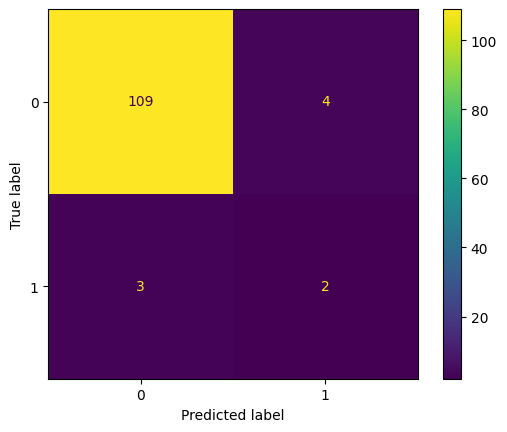

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)

In [54]:
y_pred2 = rfcmodel.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       102
           1       0.50      0.19      0.27        16

    accuracy                           0.86       118
   macro avg       0.69      0.58      0.60       118
weighted avg       0.83      0.86      0.84       118



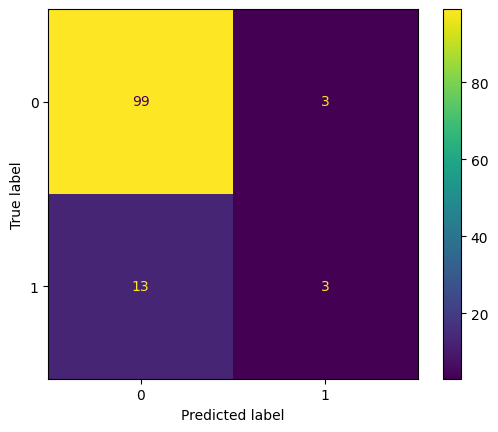

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2)

# Discussion for part 4
After looking into evaluation metrics for our the algorithms we can talk about the risk and uncertainity associated with the recomendations we have made.

The accuracy score of both algorithms are reasonably high and one would assume that we would be predicting a feature requests and bug reports on unseen data accurately and the results can be used to make credible recommendations. However that is not entirely true. By looking into the labelled data set the we used to predict we can see that it was not balanced data set and only 8% of the data was classfied as feature request and 16% was classified as bug report. Using this data to train the model leads to a bias in the model and hence it will tend to predict more values as not a feature request or not a bug report.

As a result we have to look into other metrics such as precision and recall to see the risk and uncertainity of our models.For our first model the precision and recall scores are pretty low. Precision is ratio of correctly predicted feature requests to total predicted as feature requests.Since this score is low it means that alot of the reviews classfied as feature requests might not actaully be feature requests and we cannot just rely on that to give recomendations.However a fix for that was to manually go over the review texts and verify that the predicted feature requests are actaully feature requests before giving out the recomendations for making the changes. This way the risk of giving an incorrect recommendation was minimized. Recall is ratio of correctly predicted feature requests to the total feature requests in data. The low recall of 0.4 means that alot of feature requests present in the rewiews were wrongly classified by the model and we missed out on potential feature requests. However for feature requests a more important metric is precision since a wrong recomendation can waste alot of time of developers and we were able to add another layer of manual validation to limit this risk.

As for our second algorithm, a low precison means that reviews classified the  as bug reports, half of them might not actually be bug reports. The risk of giving a wrong recomendation to developer in this case was again reduced by manually valiated if its actaully a bug report. But in this case the more important metric was recall. Since we have a very low score of 0.25 it means that approx 3/4 of reviews that were actually bug reports might be classified otherwise and hence leads to alot of bug reports go unnoticed and we are not able to recomend changes to developers that were needed to satify users.

# Task 5

In [70]:
from gensim import corpora
from gensim.models import LdaModel

combined_reviews['tokenized_reviews'] = combined_reviews['Review'].str.split()
dictionary = corpora.Dictionary(combined_reviews['tokenized_reviews'])

reviews_corpus = [dictionary.doc2bow(doc) for doc in combined_reviews['tokenized_reviews']]

lda_model = LdaModel(reviews_corpus, num_topics=15, id2word=dictionary, passes=15)

# Explore topics
topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)

(0, '0.067*"two" + 0.043*"one" + 0.032*"hundred" + 0.028*"three" + 0.024*"and" + 0.024*"charge" + 0.023*"thousand"')
(1, '0.102*"ev" + 0.072*"app" + 0.054*"useful" + 0.035*"user" + 0.034*"owner" + 0.033*"electric" + 0.031*"accurate"')
(2, '0.064*"app" + 0.055*"charge" + 0.050*"charging" + 0.043*"time" + 0.036*"station" + 0.024*"start" + 0.020*"car"')
(3, '0.058*"charger" + 0.038*"working" + 0.036*"nice" + 0.028*"broken" + 0.026*"free" + 0.023*"parking" + 0.023*"one"')
(4, '0.112*"station" + 0.107*"charging" + 0.052*"app" + 0.033*"find" + 0.024*"charger" + 0.019*"best" + 0.015*"available"')
(5, '0.308*"use" + 0.274*"easy" + 0.035*"super" + 0.020*"quick" + 0.018*"intuitive" + 0.015*"charge" + 0.014*"fast"')
(6, '0.208*"great" + 0.168*"app" + 0.145*"good" + 0.039*"far" + 0.017*"experience" + 0.013*"pretty" + 0.013*"job"')
(7, '0.108*"charger" + 0.056*"home" + 0.041*"location" + 0.021*"notification" + 0.017*"need" + 0.014*"fifty" + 0.014*"get"')
(8, '0.193*"love" + 0.105*"helpful" + 0.053*

part 2:

The topics are good way to get a summirization of what users are talking about and their sentiments. As a trend observed in the labelled data too the reviews are mostly about users sentiment towards the app's funtionaing and featuers. and less reviews are about new features requests. The same pattern is observed  in the review topics extracted from my apps. These topics mostly represent the users sentiments towards the app and its existing features. For example topic 2, 4, 5,6,8 highlight the usefullnes of app in finding ev chargers and their location.These are the functionalities currently being offered by these apps as observed from google play pages. The words like 'useful', 'best', 'easy', 'love', 'helpful' etc in these topics also show the postive sentiment of users towards the app which was earlier highlighted in the discussion of overall postive sentiments of reviews predicted using sentiment analysis.


part 3:
These topic extracted provide a more meaningful analysis of our bug reporting and issues highlighted in bug reports. Even though the number of bugs in training set was low but it was higher than feature requests and again a similar trend was noticed in our apps data and a higher number of bug reports were found. Looking into the topics some of the topics match with the bug reports esp those that were faced by alot of users and there were alot of reviews regarding those.
For example in topic 10 'account', 'charge', 'card', 'chargepoint' etc correspond to bug reported by alot of users regarding one of the app ChargePoint charging their bank account a generic amount of money when balance in the app goes below a certain value and not allowing the users to set default value for autoreloading. There are also reviews from other apps as well that were facing problems with payment options.
In topic 11 and 12, 'issue', 'connection', 'sign', 'connect' correspond to reviews classified as bug report talking about network issues on the app and not being able to use the app and facing either network issues or the app crashing.A lot of users also faces problems in signing in as the app would keep giving an error when they logged in used correct info.





part 4:

Task 4 is a supervied learning model which is more accurate and gives us alot of helps us in giving specific recommendations to the developers and points to exact reviews and we can get a clear picture of what feature or bug the user is talking about.Since it points to individual responses we do not know if the bug or feature request we do not know if the opinion is shared by alot of the users or not.So the data for our recomendation is usually is a single review. But in terms of accuracy when properly trained it can provide accurate insight into features and bugs being reported in our reviews.

Task 5 is an unsupervied model which requires less work since we do not have to classify our reviews and train the model with it but is less accurate. It does not directly point us to specific features but provides us with overall summary of user reviews and what feaatures and bugs are they generally talking about and what our their sentiments towards our app. The model provides us most insight into features and bugs that are being dominanlty talked about in the reviews and hence we know that the sentiment is shared by alot of the users of the app.